In [1]:
import pandas as pd
import seaborn as sns
import openpyxl
import matplotlib.pyplot as plt
import os
plt.style.use("dark_background")
%matplotlib inline

In [2]:
a = "X:\\Amar\\Python\\Study material\\Data analyst\\Data analyst project\\Shopping site dataset\\Assignment_Dataset.xlsx"

order_data = pd.read_excel(os.path.join(a), engine="openpyxl", sheet_name="Orders")
order_data.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.1544,40.77,High


<h3>Check Null value</h3>

In [3]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [4]:
order_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [5]:
order_data.drop(columns="Postal Code", inplace=True)

In [6]:
order_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Region', 'Market', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [7]:
order_data.describe()

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,246.490581,3.476545,0.142908,28.610982,26.478567
std,14806.29199,487.565361,2.278766,0.212280,174.340972,57.251373
min,1.00000,0.444000,1.000000,0.000000,-6599.978000,1.002000
25%,12823.25000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,22638.480000,14.000000,0.850000,8399.976000,933.570000


<h3>Category wise value count</h3>

In [8]:
category = order_data["Category"].value_counts()
category = category.reset_index()
category

,index,Category
0,Office Supplies,31289
1,Technology,10141
2,Furniture,9860


c:\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2]),
 [Text(0, 0, 'Technology'),
  Text(1, 0, 'Furniture'),
  Text(2, 0, 'Office Supplies')])

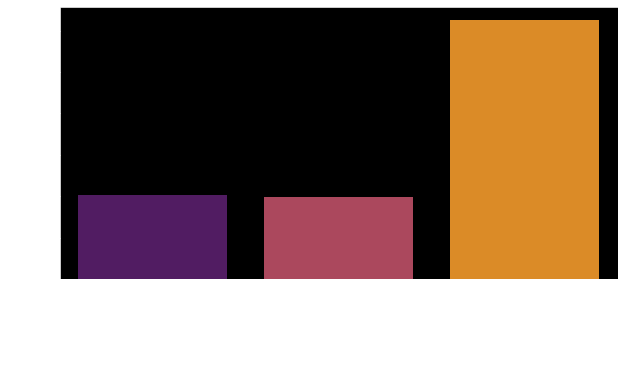

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(order_data["Category"], palette="inferno")
plt.xticks(rotation = 90)

(array([0, 1, 2]),
 [Text(0, 0, 'Office Supplies'),
  Text(1, 0, 'Technology'),
  Text(2, 0, 'Furniture')])

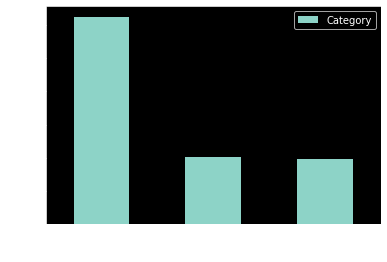

In [96]:
category.plot(kind="bar", x="index", y="Category")
plt.xticks(rotation = 0)

<h3>Market<b>(region)</b> wise value count</h3>

In [10]:
market_data = order_data["Market"].value_counts()
market_data

Asia Pacific    14302
Europe          11729
USCA            10378
LATAM           10294
Africa           4587
Name: Market, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Asia Pacific'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'USCA'),
  Text(3, 0, 'LATAM'),
  Text(4, 0, 'Africa')])

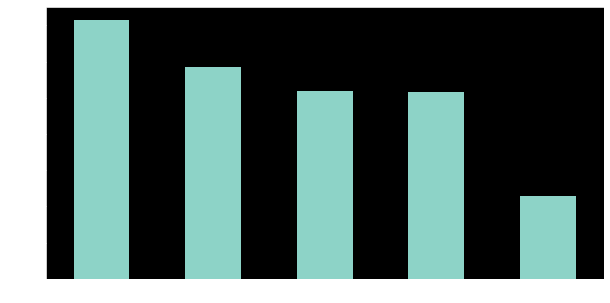

In [11]:
# plt.figure(figsize=(10, 5))
# sns.barplot(market_data.value_counts(), palette="inferno")
# plt.xticks(rotation = 90)
market_data.plot(kind="bar", figsize=(10, 5))
plt.xticks(rotation = 0)

<h3>group by Maket calaculate dicount</h3>

In [12]:
market_discount = order_data.groupby("Market")["Discount"].sum().reset_index()
market_discount

,Market,Discount
0,Africa,718.800
1,Asia Pacific,2588.630
2,Europe,1066.050
3,LATAM,1395.158
4,USCA,1561.090


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Asia Pacific'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'LATAM'),
  Text(4, 0, 'USCA')])

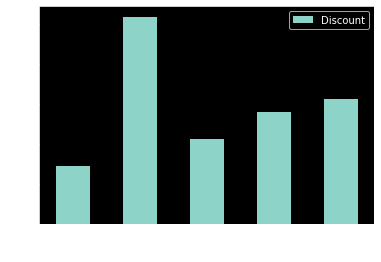

In [13]:
market_discount.plot(kind="bar", x = "Market", y = "Discount")
plt.xticks(rotation = 0)

<h3>group by Maket calaculate profit</h3>

In [14]:
order_data.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.1544,40.77,High


In [15]:
market_profit = order_data.groupby("Market")["Profit"].max().reset_index()
market_profit

,Market,Profit
0,Africa,2597.280
1,Asia Pacific,2939.310
2,Europe,3979.080
3,LATAM,1313.280
4,USCA,8399.976


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Asia Pacific'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'LATAM'),
  Text(4, 0, 'USCA')])

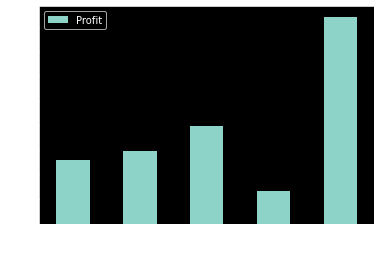

In [16]:
market_profit.plot(kind = "bar", x = "Market")
plt.xticks(rotation = 0)

<h1>-----------------------------------------------</h1>

In [84]:
returns_data = pd.read_excel(os.path.join(a), engine="openpyxl", sheet_name="Returns")
returns_data.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [85]:
returns_data1 = returns_data.drop(columns = "Order ID")
returns_data1

,Returned,Region
0,Yes,Central US
1,Yes,Eastern Asia
2,Yes,Central US
3,Yes,Oceania
4,Yes,Oceania
...,...,...
1074,Yes,Southern Asia
1075,Yes,Eastern US
1076,Yes,Central America
1077,Yes,Eastern US


In [86]:
returns_data1 = returns_data1["Region"].value_counts().reset_index()
returns_data1

,index,Region
0,Western Europe,121
1,Central America,117
2,Oceania,78
3,Western US,72
4,Eastern US,69
...,...,...
19,Eastern Africa,11
20,Central Africa,10
21,Eastern Canada,5
22,Central Asia,4


In [87]:
returns_data1["index"].count()

24

<AxesSubplot:xlabel='index'>

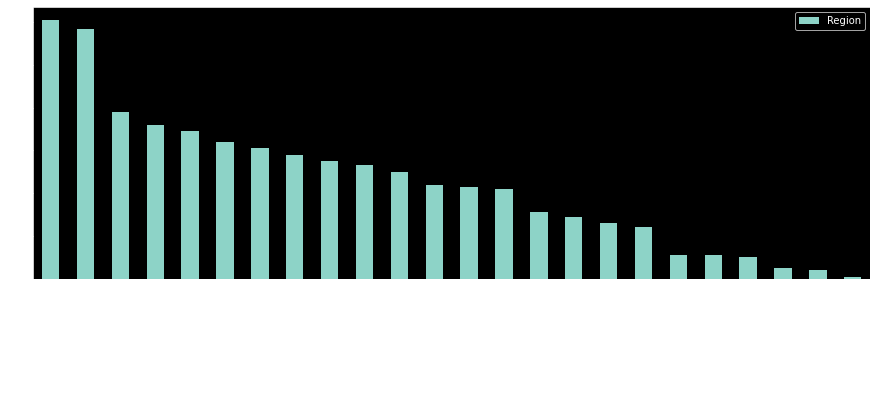

In [88]:
returns_data1.plot(kind = "bar", x = "index", y = "Region", figsize = (15, 5))

In [89]:
order_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Region', 'Market', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

<h3>Drop not required columns</h3>

In [90]:
o_data = order_data.drop(columns=['Row ID','Order Date', 'Ship Date','Customer ID', 'Customer Name', 'Segment','Product ID'])
o_data.head()

,Order ID,Ship Mode,City,State,Country,Region,Market,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,CA-2014-AB10015140-41954,First Class,Oklahoma City,Oklahoma,United States,Central US,USCA,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,IN-2014-JR162107-41675,Second Class,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,IN-2014-CR127307-41929,First Class,Brisbane,Queensland,Australia,Oceania,Asia Pacific,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,ES-2014-KM1637548-41667,First Class,Berlin,Berlin,Germany,Western Europe,Europe,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,SG-2014-RH9495111-41948,Same Day,-;Dakar,Dakar,Senegal,Western Africa,Africa,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [91]:
r_data = returns_data.copy()
r_data

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania
...,...,...,...
1074,Yes,IN-2014-DA1345058-41769,Southern Asia
1075,Yes,US-2013-HG14845140-41530,Eastern US
1076,Yes,US-2013-SJ2021582-41543,Central America
1077,Yes,CA-2015-EB13870140-42269,Eastern US


<h3>Merge two sheet Orders and Return on column <b>"Order_ID"</b></h3>

In [93]:
r_o_data = pd.merge(left=o_data, right=r_data, how="inner", left_on="Order ID", right_on="Order ID")
r_o_data.head()

,Order ID,Ship Mode,City,State,Country,Region_x,Market,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Region_y
0,IN-2012-PB19210127-41259,First Class,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,Furniture,Tables,"Lesro Conference Table, with Bottom Storage",1715.16,2,0.0,720.36,725.57,Critical,Yes,Eastern Asia
1,IN-2012-PB19210127-41259,First Class,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,Furniture,Bookcases,"Safco Classic Bookcase, Pine",2197.50,5,0.0,153.75,627.27,Critical,Yes,Eastern Asia
2,IN-2012-PB19210127-41259,First Class,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,Furniture,Tables,"Lesro Round Table, with Bottom Storage",1356.03,3,0.0,311.85,458.97,Critical,Yes,Eastern Asia
3,IN-2012-PB19210127-41259,First Class,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,Furniture,Chairs,"Office Star Swivel Stool, Adjustable",882.15,5,0.0,114.60,203.92,Critical,Yes,Eastern Asia
4,IN-2012-PB19210127-41259,First Class,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,Technology,Machines,"Okidata Calculator, Red",148.32,3,0.0,68.22,25.48,Critical,Yes,Eastern Asia


<h3>Total returned ordered after merging</h3>

In [94]:
r_o_data["Returned"].count()

2220

In [95]:
r_o_data.groupby("Region_y").count()

,Order ID,Ship Mode,City,State,Country,Region_x,Market,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned
Region_y,,,,,,,,,,,,,,,,,
Caribbean,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69
Central Africa,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
Central America,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248
Central Asia,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
Central US,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Africa,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
Western Asia,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108
Western Canada,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [96]:
r_o_data["Region_y"].value_counts()

Central America      248
Western Europe       233
Western US           180
Oceania              154
Southeastern Asia    140
Eastern US           134
South America        133
Eastern Asia         131
Southern Europe      112
Southern Asia        111
Western Asia         108
Southern US           83
Northern Europe       76
Central US            71
Caribbean             69
Western Africa        60
North Africa          51
Eastern Europe        42
Southern Africa       25
Eastern Africa        18
Central Africa        17
Eastern Canada        10
Central Asia           9
Western Canada         5
Name: Region_y, dtype: int64

<h3>Region wise return order on graph</h3>

c:\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'Eastern Asia'),
  Text(1, 0, 'Oceania'),
  Text(2, 0, 'Southern US'),
  Text(3, 0, 'Western Europe'),
  Text(4, 0, 'Southern Europe'),
  Text(5, 0, 'Western Asia'),
  Text(6, 0, 'Southern Africa'),
  Text(7, 0, 'Eastern Europe'),
  Text(8, 0, 'Southeastern Asia'),
  Text(9, 0, 'Southern Asia'),
  Text(10, 0, 'Northern Europe'),
  Text(11, 0, 'Central America'),
  Text(12, 0, 'Eastern US'),
  Text(13, 0, 'South America'),
  Text(14, 0, 'Western US'),
  Text(15, 0, 'North Africa'),
  Text(16, 0, 'Central US'),
  Text(17, 0, 'Caribbean'),
  Text(18, 0, 'Central Africa'),
  Text(19, 0, 'Western Africa'),
  Text(20, 0, 'Eastern Africa'),
  Text(21, 0, 'Eastern Canada'),
  Text(22, 0, 'Central Asia'),
  Text(23, 0, 'Western Canada')])

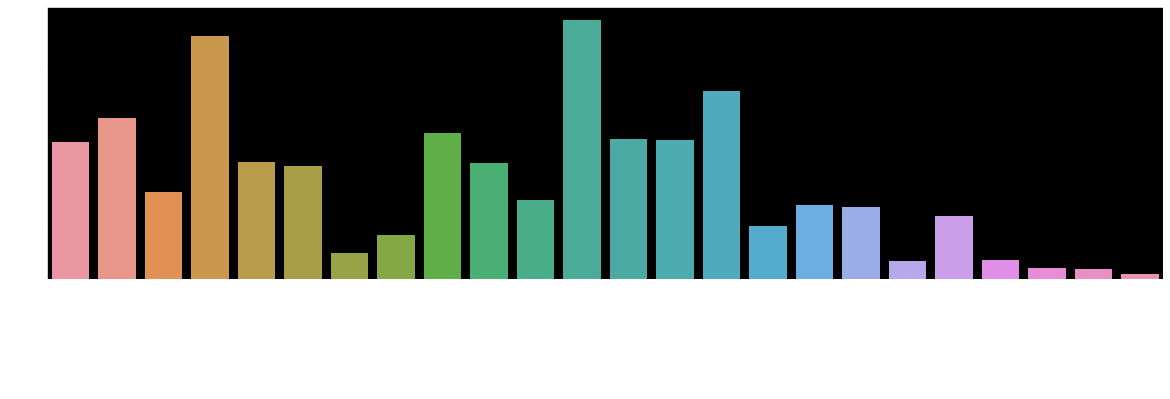

In [97]:
plt.figure(figsize = (20, 5))
sns.countplot(r_o_data["Region_y"])
plt.xticks(rotation = 90)

In [98]:
order_data["Region"].value_counts()

Western Europe       5883
Central America      5616
Oceania              3487
Western US           3203
Southeastern Asia    3129
South America        2988
Eastern US           2848
Southern Asia        2655
Western Asia         2440
Eastern Asia         2374
Central US           2323
Northern Europe      2204
Southern Europe      2113
Caribbean            1690
Southern US          1620
Eastern Europe       1529
Western Africa       1460
North Africa         1278
Eastern Africa        728
Central Africa        643
Southern Africa       478
Canada                384
Central Asia          217
Name: Region, dtype: int64

c:\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Central US'),
  Text(1, 0, 'Oceania'),
  Text(2, 0, 'Western Europe'),
  Text(3, 0, 'Western Africa'),
  Text(4, 0, 'Western US'),
  Text(5, 0, 'Southern Asia'),
  Text(6, 0, 'Western Asia'),
  Text(7, 0, 'South America'),
  Text(8, 0, 'Eastern Asia'),
  Text(9, 0, 'Southern Europe'),
  Text(10, 0, 'Eastern Africa'),
  Text(11, 0, 'Eastern Europe'),
  Text(12, 0, 'Northern Europe'),
  Text(13, 0, 'Central America'),
  Text(14, 0, 'Eastern US'),
  Text(15, 0, 'Caribbean'),
  Text(16, 0, 'Central Africa'),
  Text(17, 0, 'Southeastern Asia'),
  Text(18, 0, 'Southern US'),
  Text(19, 0, 'North Africa'),
  Text(20, 0, 'Southern Africa'),
  Text(21, 0, 'Canada'),
  Text(22, 0, 'Central Asia')])

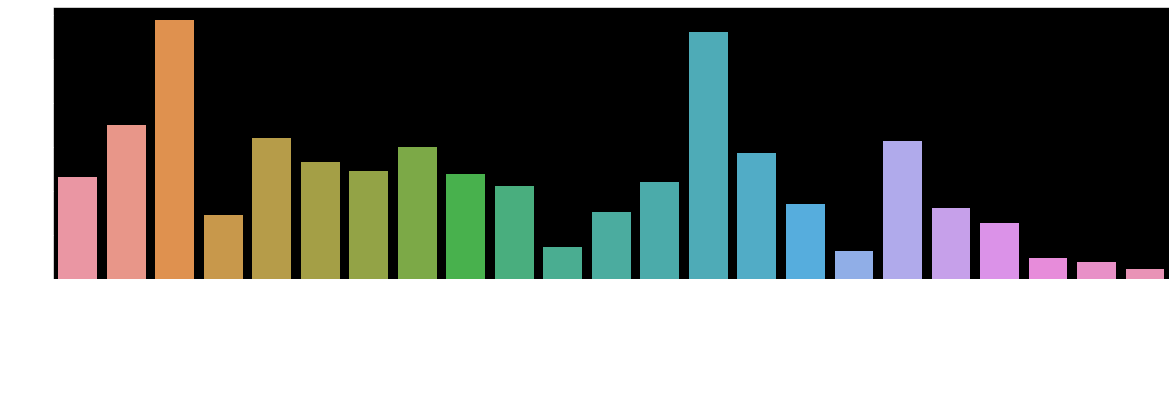

In [99]:
plt.figure(figsize = (20, 5))
sns.countplot(order_data["Region"])
plt.xticks(rotation = 90)

<h3>Orders sheet - Region wise order priority(High) profit</h3>

In [100]:
order_data.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.1544,40.77,High


In [101]:
order_data[(order_data["Order Priority"] == "High") & (order_data["Region"])].count().reset_index()

,index,0
0,Row ID,15501
1,Order ID,15501
2,Order Date,15501
3,Ship Date,15501
4,Ship Mode,15501
...,...,...
18,Quantity,15501
19,Discount,15501
20,Profit,15501
21,Shipping Cost,15501


In [102]:
reg_pri_high = order_data.groupby("Order Priority")["Region"].value_counts()

In [103]:
reg_pri_high1 = reg_pri_high.to_csv("reg_pri_high.csv")
reg_pri_high1 = pd.read_csv("reg_pri_high.csv")
reg_pri_high1

,Order Priority,Region,Region.1
0,Critical,Western Europe,448
1,Critical,Central America,418
2,Critical,Oceania,291
3,Critical,Western US,243
4,Critical,Eastern US,235
...,...,...,...
87,Medium,Eastern Africa,394
88,Medium,Central Africa,332
89,Medium,Southern Africa,247
90,Medium,Canada,208


<h3>Rename Region.1 to Count</h3>

In [104]:
reg_pri_high1 = reg_pri_high1.rename(columns={"Region.1":"Count"})

In [105]:
reg_pri_high1

,Order Priority,Region,Count
0,Critical,Western Europe,448
1,Critical,Central America,418
2,Critical,Oceania,291
3,Critical,Western US,243
4,Critical,Eastern US,235
...,...,...,...
87,Medium,Eastern Africa,394
88,Medium,Central Africa,332
89,Medium,Southern Africa,247
90,Medium,Canada,208


<h3>Create Pivote Table</h3>

In [106]:
reg_pri_high_pivote = pd.pivot_table(reg_pri_high1, index="Order Priority", columns="Region", values="Count")
reg_pri_high_pivote

Region,Canada,Caribbean,Central Africa,Central America,Central Asia,Central US,Eastern Africa,Eastern Asia,Eastern Europe,Eastern US,...,South America,Southeastern Asia,Southern Africa,Southern Asia,Southern Europe,Southern US,Western Africa,Western Asia,Western Europe,Western US
Order Priority,,,,,,,,,,,,,,,,,,,,,
Critical,37,106,46,418,23,168,74,207,135,235,...,231,169,48,208,183,137,118,171,448,243
High,128,599,228,1616,71,671,224,726,460,882,...,905,940,159,776,633,493,424,723,1682,1023
Low,11,71,37,331,11,105,36,117,68,104,...,118,144,24,95,112,67,45,131,302,156
Medium,208,914,332,3251,112,1379,394,1324,866,1627,...,1734,1876,247,1576,1185,923,873,1415,3451,1781


<AxesSubplot:xlabel='Order Priority'>

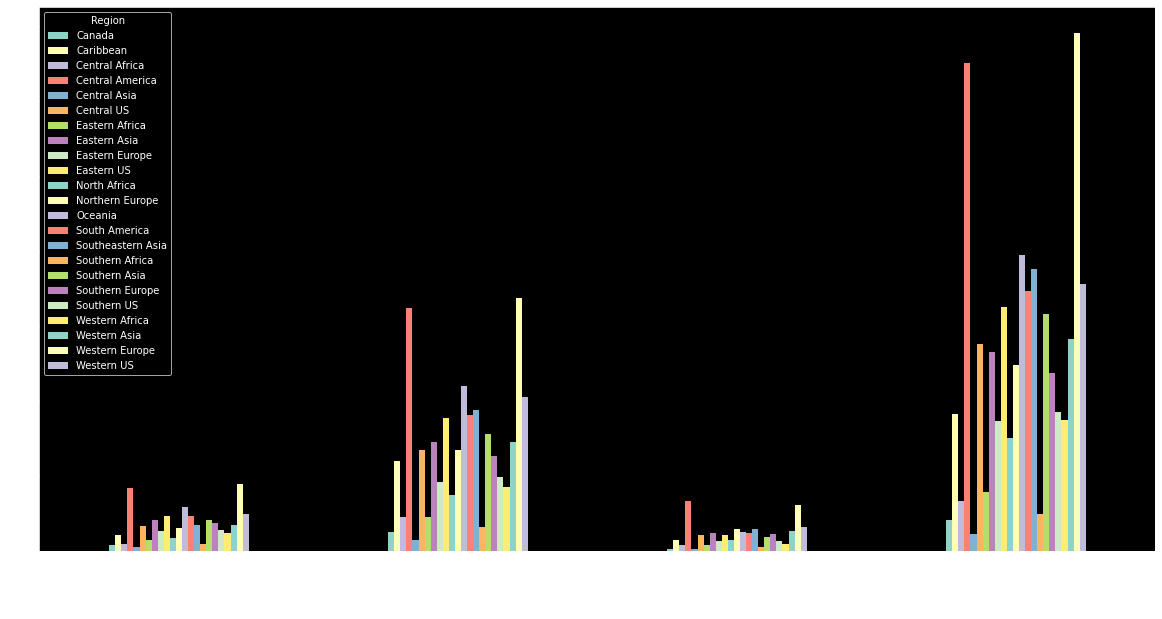

In [139]:
reg_pri_high_pivote.plot(kind="bar", figsize=(20, 10))

In [107]:
high_priority = reg_pri_high1[reg_pri_high1["Order Priority"] == "High"]

In [108]:
high_priority

,Order Priority,Region,Count
23,High,Western Europe,1682
24,High,Central America,1616
25,High,Oceania,1100
26,High,Western US,1023
27,High,Southeastern Asia,940
...,...,...,...
41,High,Central Africa,228
42,High,Eastern Africa,224
43,High,Southern Africa,159
44,High,Canada,128


<AxesSubplot:xlabel='Region'>

<Figure size 1080x720 with 0 Axes>

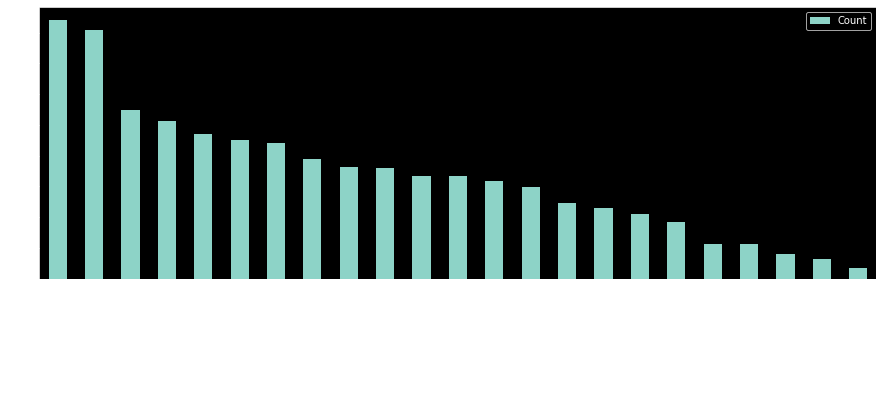

In [109]:
plt.figure(figsize=(15, 10))
high_priority.plot(kind="bar",x="Region", figsize=(15, 5))

<h1>---------------------------------------------------------</h1>

<h3>Region wise Order data</h3>

In [110]:
r_o_data.columns

Index(['Order ID', 'Ship Mode', 'City', 'State', 'Country', 'Region_x',
       'Market', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority',
       'Returned', 'Region_y'],
      dtype='object')

<h3>Region and Order sheet having High priority</h3>

In [119]:
r_o_data1 = r_o_data.groupby("Order Priority")["Region_y"].value_counts()
r_o_data1 = r_o_data1.to_csv("r_o_data1.csv")
r_o_data1 = pd.read_csv("r_o_data1.csv")
r_o_data1

,Order Priority,Region_y,Region_y.1
0,Critical,Eastern Asia,28
1,Critical,Oceania,17
2,Critical,Southeastern Asia,17
3,Critical,Western US,16
4,Critical,Eastern US,14
...,...,...,...
80,Medium,Southern Africa,11
81,Medium,Eastern Africa,9
82,Medium,Western Canada,5
83,Medium,Eastern Canada,3


<h3>Rename column</h3>

In [141]:
r_o_data1 = r_o_data1.rename(columns={"Region_y":"Region", "Region_y.1":"Count"})
r_o_data1

,Order Priority,Region,Count
0,Critical,Eastern Asia,28
1,Critical,Oceania,17
2,Critical,Southeastern Asia,17
3,Critical,Western US,16
4,Critical,Eastern US,14
...,...,...,...
80,Medium,Southern Africa,11
81,Medium,Eastern Africa,9
82,Medium,Western Canada,5
83,Medium,Eastern Canada,3


<h3>Create Pivote table</h3>

In [142]:
r_o_pivote = pd.pivot_table(r_o_data1, index="Order Priority", columns="Region", values="Count")
r_o_pivote

Region,Caribbean,Central Africa,Central America,Central Asia,Central US,Eastern Africa,Eastern Asia,Eastern Canada,Eastern Europe,Eastern US,...,Southeastern Asia,Southern Africa,Southern Asia,Southern Europe,Southern US,Western Africa,Western Asia,Western Canada,Western Europe,Western US
Order Priority,,,,,,,,,,,,,,,,,,,,,
Critical,4.0,NaN,13.0,NaN,10.0,1.0,28.0,1.0,1.0,14.0,...,17.0,NaN,7.0,7.0,3.0,9.0,10.0,NaN,13.0,16.0
High,30.0,3.0,63.0,7.0,18.0,8.0,29.0,6.0,17.0,33.0,...,25.0,13.0,32.0,39.0,34.0,7.0,40.0,NaN,71.0,38.0
Low,1.0,NaN,8.0,NaN,6.0,NaN,4.0,NaN,1.0,11.0,...,8.0,1.0,7.0,7.0,2.0,5.0,3.0,NaN,11.0,28.0
Medium,34.0,14.0,164.0,2.0,37.0,9.0,70.0,3.0,23.0,76.0,...,90.0,11.0,65.0,59.0,44.0,39.0,55.0,5.0,138.0,98.0


<h3>Bar chat <b>Order Priority</b> wise</h3>

<AxesSubplot:xlabel='Order Priority'>

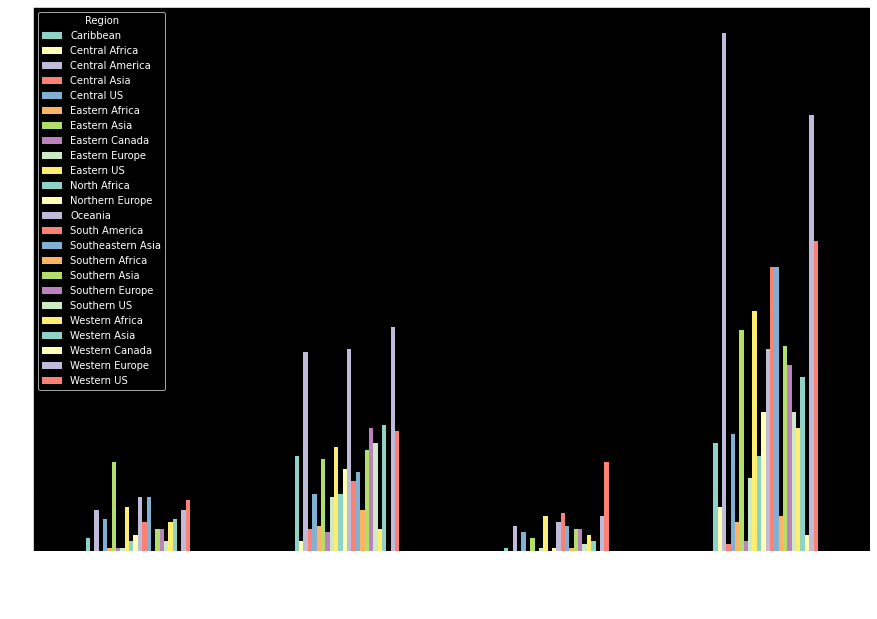

In [143]:
r_o_pivote.plot(kind="bar", figsize=(15, 10))

In [144]:
r_o_data_high = r_o_data1[r_o_data1["Order Priority"] == "High"]
r_o_data_high

,Order Priority,Region,Count
20,High,Western Europe,71
21,High,Oceania,64
22,High,Central America,63
23,High,Western Asia,40
24,High,Southern Europe,39
...,...,...,...
38,High,Eastern Africa,8
39,High,Central Asia,7
40,High,Western Africa,7
41,High,Eastern Canada,6


<AxesSubplot:xlabel='Region'>

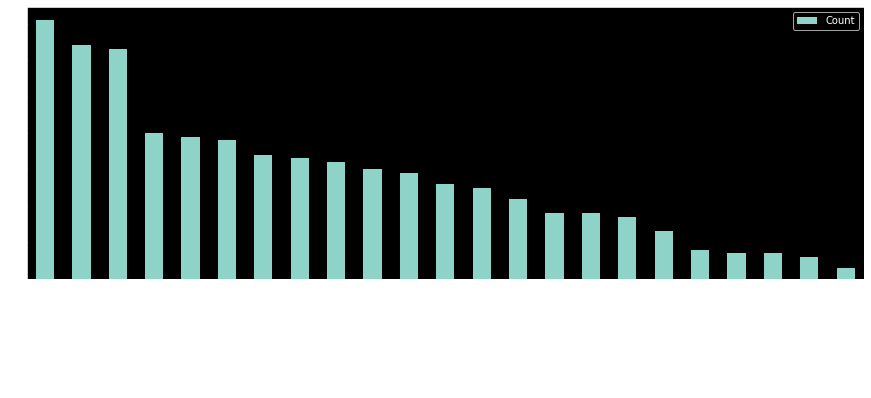

In [145]:
r_o_data_high.plot(kind="bar",x="Region", figsize=(15, 5))

<h3>Region and Order sheet Order Priority <b>Medium</b></h3>

In [146]:
r_o_data_medium = r_o_data1[r_o_data1["Order Priority"] == "Medium"]
r_o_data_medium

,Order Priority,Region,Count
61,Medium,Central America,164
62,Medium,Western Europe,138
63,Medium,Western US,98
64,Medium,South America,90
65,Medium,Southeastern Asia,90
...,...,...,...
80,Medium,Southern Africa,11
81,Medium,Eastern Africa,9
82,Medium,Western Canada,5
83,Medium,Eastern Canada,3


<AxesSubplot:xlabel='Region'>

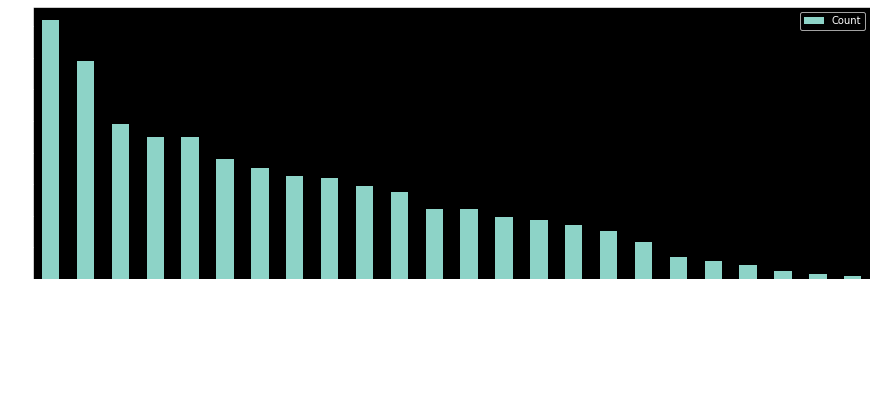

In [148]:
r_o_data_medium.plot(kind="bar",x="Region", figsize=(15, 5))